### Desafío Integrador
#### Análisis de las producciones del personal de Ciencia y Tecnología

El personal de CyT en una unidad estadística incluye a todas las personas involucradas directamente en I+D así como a aquellas que brindan servicios directos para las actividades de I + D (como gerentes de I + D, administradores, técnicos y personal de oficina). 

### Etapa 1: Limpieza de las bases de datos

#### 1. Lectura e interpretación de la Personas 2016

In [301]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [302]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
#Se lee la tabla Personas 2016
personas_2012=pd.read_csv('personas_2012.csv',sep=";")
#Se guarda la tabla original por si se necesita posteriormente
personas_2012_original=personas_2012

In [304]:
personas_2012.head()

,persona_id,anio,sexo_id,edad,maximo_grado_academico_id,disciplina_maximo_grado_academico_id,disciplina_titulo_grado_id,disciplina_experticia_id,tipo_personal_id,producciones_ult_anio,...,producciones_ult_3_anios,producciones_ult_4_anios,institucion_trabajo_id,seniority_level,categoria_conicet_id,categoria_incentivos,max_dedicacion_horaria_docente_id,institucion_cargo_docente_id,clase_cargo_docente_id,tipo_condicion_docente_id
0,1,2012,2,37,-1,-1,-1,64,4,0,...,1,1,4488,,11.0,-1.0,3.0,116.0,22.0,1.0
1,5,2012,1,49,1,255,255,255,3,4,...,11,17,118,B,2.0,3.0,3.0,118.0,19.0,2.0
2,7,2012,2,31,5,111,111,158,1,3,...,16,16,587,D,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2012,2,62,1,256,256,157,3,7,...,21,23,5191,B,NaN,NaN,NaN,NaN,NaN,NaN
4,10,2012,2,52,5,248,248,29,4,2,...,3,5,44,,-1.0,4.0,3.0,101.0,21.0,1.0


In [305]:
personas_2012[['persona_id','edad','producciones_ult_anio','producciones_ult_2_anios', 'producciones_ult_3_anios',
       'producciones_ult_4_anios']].head()

,persona_id,edad,producciones_ult_anio,producciones_ult_2_anios,producciones_ult_3_anios,producciones_ult_4_anios
0,1,37,0,0,1,1
1,5,49,4,9,11,17
2,7,31,3,14,16,16
3,9,62,7,12,21,23
4,10,52,2,2,3,5


In [306]:
personas_2012.shape

(66685, 21)

In [307]:
personas_2012.columns

Index(['persona_id', 'anio', 'sexo_id', 'edad', 'maximo_grado_academico_id',
       'disciplina_maximo_grado_academico_id', 'disciplina_titulo_grado_id',
       'disciplina_experticia_id', 'tipo_personal_id', 'producciones_ult_anio',
       'producciones_ult_2_anios', 'producciones_ult_3_anios',
       'producciones_ult_4_anios', 'institucion_trabajo_id', 'seniority_level',
       'categoria_conicet_id', 'categoria_incentivos',
       'max_dedicacion_horaria_docente_id', 'institucion_cargo_docente_id',
       'clase_cargo_docente_id', 'tipo_condicion_docente_id'],
      dtype='object')

#### 2. Unión de la tabla Personas 2016 con las tablas de referencias

La base de datos original tiene la mayoría de sus datos con códigos, para poder interpretar a qué corresponde cada código se cuenta con tablas de referencias que los describen. Se procede a unir cada código con su identificación.

In [308]:
#Analizamos las referencias de sexo:
sexo=pd.read_csv('ref_sexo.csv',sep=";")
sexo

,sexo_id,sexo_descripcion
0,1,FEMENINO
1,2,MASCULINO


In [309]:
#Se cambian los números por "F" y "M" para hacer más simple la identificación de dummies
personas_2012['sexo_id']= personas_2012['sexo_id'].apply(lambda x: 'F' if x ==1 else 'M')
personas_2012.rename(columns={"sexo_id": "sexo"},inplace=True)
personas_2012.head()

,persona_id,anio,sexo,edad,maximo_grado_academico_id,disciplina_maximo_grado_academico_id,disciplina_titulo_grado_id,disciplina_experticia_id,tipo_personal_id,producciones_ult_anio,...,producciones_ult_3_anios,producciones_ult_4_anios,institucion_trabajo_id,seniority_level,categoria_conicet_id,categoria_incentivos,max_dedicacion_horaria_docente_id,institucion_cargo_docente_id,clase_cargo_docente_id,tipo_condicion_docente_id
0,1,2012,M,37,-1,-1,-1,64,4,0,...,1,1,4488,,11.0,-1.0,3.0,116.0,22.0,1.0
1,5,2012,F,49,1,255,255,255,3,4,...,11,17,118,B,2.0,3.0,3.0,118.0,19.0,2.0
2,7,2012,M,31,5,111,111,158,1,3,...,16,16,587,D,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2012,M,62,1,256,256,157,3,7,...,21,23,5191,B,NaN,NaN,NaN,NaN,NaN,NaN
4,10,2012,M,52,5,248,248,29,4,2,...,3,5,44,,-1.0,4.0,3.0,101.0,21.0,1.0


In [310]:
#Analizamos las referencias de grado académico
grado=pd.read_csv('ref_grado_academico.csv',sep=";")
grado

,grado_academico_id,descripcion
0,-1,Sin datos
1,1,Universitario de posgrado/doctorado
2,2,Universitario de posgrado/maestría
3,3,Universitario de posgrado/especialización
4,4,Universitario de posgrado/perfeccionamiento
5,5,Universitario de grado
6,6,Terciario no universitario
7,7,Medio
8,8,Básico
9,9,Universitario de posdoctorado


In [311]:
#Se hace un merge con la tabla original
personas_2012=pd.merge(personas_2012, grado, how='left',left_on='maximo_grado_academico_id',right_on='grado_academico_id')
#Se Se renombra la columna "descripcion" para mejor interpretación
personas_2012.rename(columns={"descripcion": "max_grado_academico"},inplace=True)
#Se eliminan las columnas que ya no se necesitan
personas_2012.drop(columns=['maximo_grado_academico_id','grado_academico_id'],inplace=True)

In [312]:
#Analizamos las referenicas de diciplinas
disciplina=pd.read_csv('ref_disciplina.csv',sep=";")
disciplina.head()

,disciplina_id,gran_area_codigo,gran_area_descripcion,area_codigo,area_descripcion,disciplina_codigo,disciplina_descripcion
0,-1,-1,SIN DATOS,-1.0,SIN DATOS,-1,SIN DATOS
1,1,1,CIENCIAS NATURALES Y EXACTAS,1.0,SIN DATOS,1.0.0,SIN DATOS
2,2,1,CIENCIAS NATURALES Y EXACTAS,1.1,Matemáticas,1.1.0,SIN DATOS
3,3,1,CIENCIAS NATURALES Y EXACTAS,1.1,Matemáticas,1.1.1,Matemática Pura
4,4,1,CIENCIAS NATURALES Y EXACTAS,1.1,Matemáticas,1.1.2,Matemática Aplicada


In [313]:
#Nos quedamos con Gran Área expertis
disciplina=disciplina[['disciplina_id','gran_area_descripcion']]
disciplina.head()

,disciplina_id,gran_area_descripcion
0,-1,SIN DATOS
1,1,CIENCIAS NATURALES Y EXACTAS
2,2,CIENCIAS NATURALES Y EXACTAS
3,3,CIENCIAS NATURALES Y EXACTAS
4,4,CIENCIAS NATURALES Y EXACTAS


In [314]:
#Hacemos merge con disciplina_experticia_id, renombramos columnas y eliminamos las que no se necesitan
personas_2012=pd.merge(personas_2012, disciplina, how='left',left_on='disciplina_experticia_id',right_on='disciplina_id')
personas_2012.rename(columns={"gran_area_descripcion": "gran_area_experticia"},inplace=True)
personas_2012.drop(columns=['disciplina_experticia_id','disciplina_id'],inplace=True)

In [315]:
#Analizamos las referencias de tipo de personal
personal=pd.read_csv('ref_tipo_personal.csv',sep=";")
personal

,tipo_personal_id,tipo_personal_descripcion
0,-1,SIN DATOS
1,1,BECARIO DE I+D
2,2,OTRO PERSONAL DE LA INSTITUCION
3,3,INVESTIGADOR
4,4,DOCENTE


In [316]:
#Se hace un merge con la tabla original
personas_2012=pd.merge(personas_2012, personal, how='left',left_on='tipo_personal_id',right_on='tipo_personal_id')
#Se Se renombra la columna "Tipo_personal_descripcion" para simplificar
personas_2012.rename(columns={"tipo_personal_descripcion": "tipo_personal"},inplace=True)
#Se eliminan las columnas que ya no se necesitan
personas_2012.drop(columns='tipo_personal_id',inplace=True)

In [317]:
#Analizamos las referencias de tipo condicion docente
condicion=pd.read_csv('ref_tipo_condicion_docente.csv',sep=";")
condicion.head()

,tipo_condicion_docente_id,tipo_condicion_docente_descripcion
0,-1,Sin datos
1,1,Regular o por concurso
2,2,Interino
3,3,Por contrato


In [318]:
#Hacemos merge con tipo_condicion_docente_id, renombramos columnas y eliminamos las que no se necesitan
personas_2012=pd.merge(personas_2012, condicion, how='left',left_on='tipo_condicion_docente_id',right_on='tipo_condicion_docente_id')
personas_2012.rename(columns={"tipo_condicion_docente_descripcion": "condicion_docente"},inplace=True)
personas_2012.drop(columns=['tipo_condicion_docente_id'],inplace=True)

In [319]:
#Analizamos dedicacion horaria semanal
dedicacion=pd.read_csv('ref_dedicacion_horaria.csv',sep=";")
dedicacion

,tipo_dedicacion_horaria_semanal_id,tipo_dedicacion_horaria_semanal_descripcion
0,-1,Sin datos
1,1,40 horas o más
2,2,De 20 hasta 39 horas
3,3,De 0 hasta 19 horas


In [320]:
#Hacemos merge con tipo_max_dedicacion_horaria_dicente_id, renombramos columnas y eliminamos las que no se necesitan
personas_2012=pd.merge(personas_2012, dedicacion, how='left',left_on='max_dedicacion_horaria_docente_id',right_on='tipo_dedicacion_horaria_semanal_id')
personas_2012.rename(columns={"tipo_dedicacion_horaria_semanal_descripcion": "ded_horaria_docente"},inplace=True)
personas_2012.drop(columns=['max_dedicacion_horaria_docente_id','tipo_dedicacion_horaria_semanal_id'],inplace=True)

In [321]:
#Analizamos el cargo docente
cargo=pd.read_csv('ref_clase_cargo.csv',sep=";")
cargo.head()

,clase_cargo_id,tipo_cargo_descripcion,grupo_cargo_descripcion,clase_cargo_descripcion,equivalencia_cargo_docente_descripcion
0,1,VACIO/NULO,VACIO/NULO,VACIO/NULO,NaN
1,2,ERRONEO,ERRONEO,ERRONEO,NaN
2,3,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,VACIO/NULO,NaN
3,4,Cargos de I+D - En organismos científico-tecno...,Cargos de I+D en OCTs - CONICET,Investigador asistente,NaN
4,5,Cargos de I+D - En organismos científico-tecno...,Cargos de I+D en OCTs - CONICET,Investigador adjunto,NaN


In [322]:
#Nos quedamos con tipo, grupo y clase de cargo
cargo=cargo[['clase_cargo_id','tipo_cargo_descripcion','grupo_cargo_descripcion','clase_cargo_descripcion']]

In [323]:
#Hacemos merge con clase_cargo_docente_id, renombramos columnas y eliminamos las que no se necesitan
personas_2012=pd.merge(personas_2012, cargo, how='left',left_on='clase_cargo_docente_id',right_on='clase_cargo_id')
personas_2012.rename(columns={'tipo_cargo_descripcion':'tipo_cargo_docente','grupo_cargo_descripcion': 'grupo_cargo_docente',
                  'clase_cargo_descripcion':'clase_cargo_docente'},inplace=True)
personas_2012.drop(columns=['clase_cargo_docente_id','clase_cargo_id'],inplace=True)

In [324]:
#Analizamos categoria conicet
conicet=pd.read_csv('ref_categoria_conicet.csv',sep=";")
conicet

,categoria_conicet_id,categoria_conicet_descripcion
0,-1,No pertenece a Conicet
1,1,Investigador asistente
2,2,Investigador adjunto
3,3,Investigador independiente
4,4,Investigador principal
5,5,Investigador superior
6,6,Becario doctoral
7,7,Becario postdoctoral
8,8,Personal de apoyo
9,9,Gestión CyT


In [325]:
#Hacemos merge con categoria_conicet_id renombramos columnas y eliminamos las que no se necesitan
personas_2012=pd.merge(personas_2012, conicet, how='left',left_on='categoria_conicet_id',right_on='categoria_conicet_id')
personas_2012.rename(columns={"categoria_conicet_descripcion": "categoria_conicet"},inplace=True)
personas_2012.drop(columns=['categoria_conicet_id'],inplace=True)

#### 3. Se lleva la edad a rangos de edades

In [326]:
personas_2012['rango_edad']=pd.cut(personas_2012['edad'],[0,10,20,30,40,50,60,70,80,90,100])
personas_2012.drop(columns='edad',inplace=True)

#### 4. Transformación de los datos de producciones de los últimos años

Los datos de producciones de los último 2, 3 y 4 años incluyen las producciones del último año. Como lo que se busca es determinar si una persona hará una producción durante el transcurso del año, hay que restarle a los datos mencionados anteriormente  las producciones del último año.

In [327]:
#Primero se analizan los datos de cada columnas para ver si hay errores
#Producciones último año. 
#Son todos int, no hay NaN, pero se identifican 4686 valores negativos. Se detecta que son todos -1
print('Tipo de datos: ',personas_2012['producciones_ult_anio'].dtypes)
print('Nan: ',personas_2012['producciones_ult_anio'].isnull().value_counts())
print('Cantidad valores negativos: ',personas_2012.loc[personas_2012['producciones_ult_anio']<0].shape)
print('Valores negativos: ',personas_2012.loc[personas_2012['producciones_ult_anio']<0].producciones_ult_anio.unique())


Tipo de datos:  int64
Nan:  False    66685
Name: producciones_ult_anio, dtype: int64
Cantidad valores negativos:  (4686, 23)
Valores negativos:  [-1]


In [328]:
#Producciones últimos 2, 3 y 4 años 
#Son todos int, no hay NaN, y se identifican la misma cantidad de valores negativos. Además son todos -1

print('\n Nan producciones_ult_2_anios: ',personas_2012['producciones_ult_2_anios'].isnull().value_counts(),
      '\n Nan producciones_ult_3_anios: ',personas_2012['producciones_ult_3_anios'].isnull().value_counts(),
      '\n Nan producciones_ult_4_anios: ',personas_2012['producciones_ult_4_anios'].isnull().value_counts(),'\n')


print('Cantidad valores negativos:\n',
      'producciones_ult_2_anios: ',personas_2012.loc[personas_2012['producciones_ult_2_anios']<0].shape,'\n',
      'producciones_ult_3_anios: ',personas_2012.loc[personas_2012['producciones_ult_3_anios']<0].shape,'\n',
      'producciones_ult_4_anios: ',personas_2012.loc[personas_2012['producciones_ult_4_anios']<0].shape,'\n')


print('Valores negativos: \n',
      'producciones_ult_2_anios: ',personas_2012.loc[personas_2012['producciones_ult_2_anios']<0].producciones_ult_2_anios.unique(),'\n',
      'producciones_ult_3_anios: ',personas_2012.loc[personas_2012['producciones_ult_3_anios']<0].producciones_ult_3_anios.unique(),'\n',
      'producciones_ult_4_anios: ',personas_2012.loc[personas_2012['producciones_ult_4_anios']<0].producciones_ult_4_anios.unique(),'\n')
    


 Nan producciones_ult_2_anios:  False    66685
Name: producciones_ult_2_anios, dtype: int64 
 Nan producciones_ult_3_anios:  False    66685
Name: producciones_ult_3_anios, dtype: int64 
 Nan producciones_ult_4_anios:  False    66685
Name: producciones_ult_4_anios, dtype: int64 

Cantidad valores negativos:
 producciones_ult_2_anios:  (4686, 23) 
 producciones_ult_3_anios:  (4686, 23) 
 producciones_ult_4_anios:  (4686, 23) 

Valores negativos: 
 producciones_ult_2_anios:  [-1] 
 producciones_ult_3_anios:  [-1] 
 producciones_ult_4_anios:  [-1] 



In [329]:
#Se comprueba que los valores negativos son todos de los mismo registros:
personas_2012.loc[(personas_2012['producciones_ult_anio']<0) &
       (personas_2012['producciones_ult_2_anios']<0) &
       (personas_2012['producciones_ult_3_anios']<0) &
       (personas_2012['producciones_ult_4_anios']<0)].shape

(4686, 23)

In [330]:
#Se asume que son 0 producciones y se cambian los datos
personas_2012['producciones_ult_anio']= personas_2012['producciones_ult_anio'].apply(lambda x: x if x >=0 else 0)
personas_2012['producciones_ult_2_anios']= personas_2012['producciones_ult_2_anios'].apply(lambda x: x if x >=0 else 0)
personas_2012['producciones_ult_3_anios']= personas_2012['producciones_ult_3_anios'].apply(lambda x: x if x >=0 else 0)
personas_2012['producciones_ult_4_anios']= personas_2012['producciones_ult_4_anios'].apply(lambda x: x if x >=0 else 0)

In [331]:
#Se comprueba que se hayan eliminado los valores negativos
print('Cantidad valores negativos producciones_ult_anio: ',personas_2012.loc[personas_2012['producciones_ult_anio']<0].shape)
print('Cantidad valores negativos:\n',
      'producciones_ult_2_anios: ',personas_2012.loc[personas_2012['producciones_ult_2_anios']<0].shape,'\n',
      'producciones_ult_3_anios: ',personas_2012.loc[personas_2012['producciones_ult_3_anios']<0].shape,'\n',
      'producciones_ult_4_anios: ',personas_2012.loc[personas_2012['producciones_ult_4_anios']<0].shape,'\n')

Cantidad valores negativos producciones_ult_anio:  (0, 23)
Cantidad valores negativos:
 producciones_ult_2_anios:  (0, 23) 
 producciones_ult_3_anios:  (0, 23) 
 producciones_ult_4_anios:  (0, 23) 



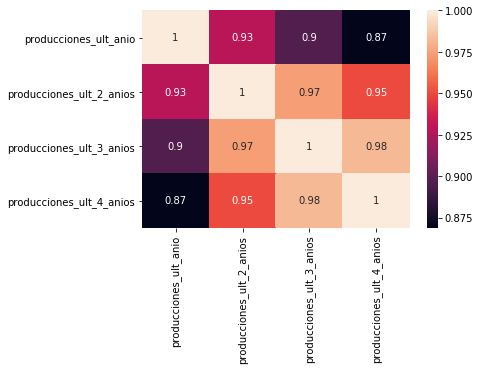

In [332]:
#Se grafica una matriz de correlación y se puede ver una alta correlación entre las producciones de diferentes años
#Esto es porque las producciones de cada año inlcuyen producciones de años anteriores
sns.heatmap(personas_2012[['producciones_ult_anio','producciones_ult_2_anios','producciones_ult_3_anios','producciones_ult_4_anios']].corr(),annot=True)

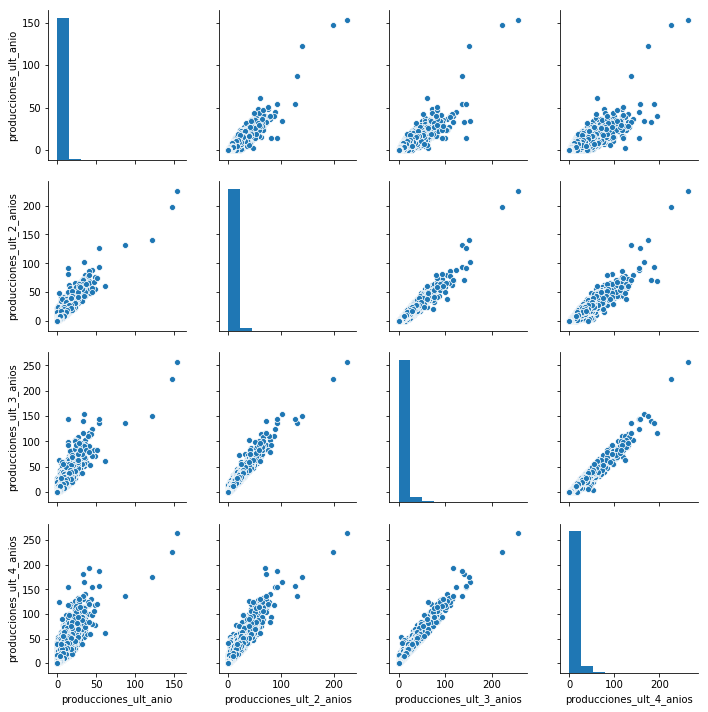

In [333]:
#Se grafica un pairpliot para ver las tendencias
sns.pairplot(personas_2012[['producciones_ult_anio','producciones_ult_2_anios','producciones_ult_3_anios','producciones_ult_4_anios']])

In [334]:
personas_2012.columns

Index(['persona_id', 'anio', 'sexo', 'disciplina_maximo_grado_academico_id',
       'disciplina_titulo_grado_id', 'producciones_ult_anio',
       'producciones_ult_2_anios', 'producciones_ult_3_anios',
       'producciones_ult_4_anios', 'institucion_trabajo_id', 'seniority_level',
       'categoria_incentivos', 'institucion_cargo_docente_id',
       'max_grado_academico', 'gran_area_experticia', 'tipo_personal',
       'condicion_docente', 'ded_horaria_docente', 'tipo_cargo_docente',
       'grupo_cargo_docente', 'clase_cargo_docente', 'categoria_conicet',
       'rango_edad'],
      dtype='object')

In [335]:
#Para disminuir la correlación se le resta a cada año las producciones de los otros años

personas_2012['producciones_ult_4_anios']=personas_2012['producciones_ult_4_anios']-personas_2012['producciones_ult_3_anios']
personas_2012['producciones_ult_3_anios']=personas_2012['producciones_ult_3_anios']-personas_2012['producciones_ult_2_anios']
personas_2012['producciones_ult_2_anios']=personas_2012['producciones_ult_2_anios']-personas_2012['producciones_ult_anio']

#se renombran las columnas

personas_2012.rename(columns={"producciones_ult_4_anios": "prod_3_años_ant",
                              "producciones_ult_3_anios": "prod_2_años_ant",
                             "producciones_ult_2_anios": "prod_año_ant",
                             "producciones_ult_anio": "prod_ultimo_año"},inplace=True)

In [336]:
print(personas_2012["prod_3_años_ant"].sum())
print(personas_2012["prod_2_años_ant"].sum())
print(personas_2012["prod_año_ant"].sum())
print(personas_2012["prod_ultimo_año"].sum())

97077
107919
128202
133031


In [337]:
97077+107919+128202+133031

466229

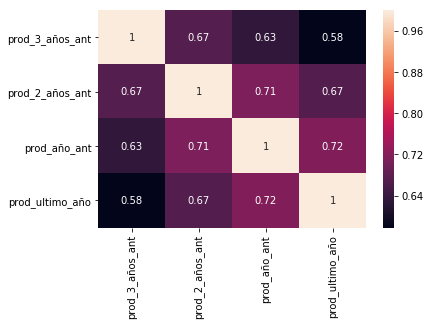

In [188]:
sns.heatmap(personas_2012[['prod_3_años_ant',
                           'prod_2_años_ant',
                           'prod_año_ant',
                           'prod_ultimo_año']].corr(),annot=True)

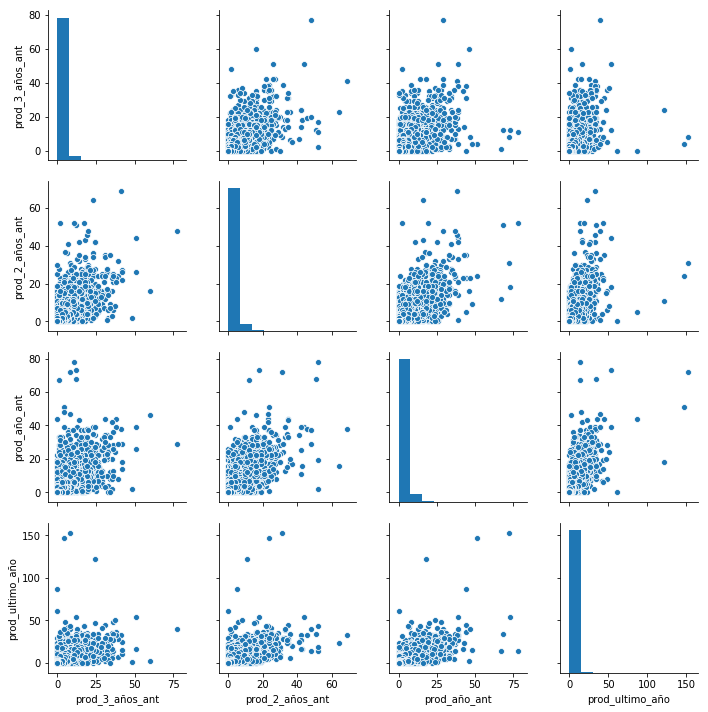

In [189]:
#Se grafica un pairpliot para ver las tendencias
sns.pairplot(personas_2012[['prod_3_años_ant',
                           'prod_2_años_ant',
                           'prod_año_ant',
                           'prod_ultimo_año']])

#### 5. Se eliminan columnas que no se usarán

In [190]:
personas_2012=personas_2012.drop(columns=['anio','disciplina_maximo_grado_academico_id',
       'disciplina_titulo_grado_id','institucion_cargo_docente_id','categoria_incentivos','institucion_trabajo_id'])

In [191]:
personas_2012.columns

Index(['persona_id', 'sexo', 'prod_ultimo_año', 'prod_año_ant',
       'prod_2_años_ant', 'prod_3_años_ant', 'seniority_level',
       'max_grado_academico', 'gran_area_experticia', 'tipo_personal',
       'condicion_docente', 'ded_horaria_docente', 'tipo_cargo_docente',
       'grupo_cargo_docente', 'clase_cargo_docente', 'categoria_conicet',
       'rango_edad'],
      dtype='object')

#### 5. Análisis de NaN y valores erróneos

In [192]:
#Sexo. No se identifican NaN ni valores erróneos
personas_2012['sexo'].value_counts()

F    38628
M    28057
Name: sexo, dtype: int64

In [193]:
personas_2012['sexo'].isnull().value_counts()

False    66685
Name: sexo, dtype: int64

In [194]:
#Edad. No hay valores erróneos
personas_2012['rango_edad'].value_counts()

(30, 40]     19307
(20, 30]     16539
(40, 50]     15018
(50, 60]     10923
(60, 70]      2959
(10, 20]      1363
(70, 80]       311
(80, 90]        20
(90, 100]        0
(0, 10]          0
Name: rango_edad, dtype: int64

In [195]:
#Se identifica 245 NaN
personas_2012['rango_edad'].isnull().value_counts()

False    66440
True       245
Name: rango_edad, dtype: int64

In [196]:
#Se elimina, es un solo registro
personas_2012=personas_2012.loc[personas_2012['rango_edad'].isnull()==False]

In [197]:
#Se analiza seniority, no se identifican NaN
personas_2012['seniority_level'].isnull().value_counts()

False    66440
Name: seniority_level, dtype: int64

In [198]:
#Se analizan los datos y se ve que hay muchos faltantes, se analizan
personas_2012['seniority_level'].value_counts()

       28609
C      14335
B       6781
D       6751
S/D     5119
A       4845
Name: seniority_level, dtype: int64

In [199]:
#No parece tener relación con ninguna de las otras catergías, además se trata de demasiados datos, se decide eliminar 
#esa columna
personas_2012.loc[(personas_2012['seniority_level']!='C') & (personas_2012['seniority_level']!='D') & 
                  (personas_2012['seniority_level']!='S/D') &
       (personas_2012['seniority_level']!='B') & (personas_2012['seniority_level']!='A')].head(30)

,persona_id,sexo,prod_ultimo_año,prod_año_ant,prod_2_años_ant,prod_3_años_ant,seniority_level,max_grado_academico,gran_area_experticia,tipo_personal,condicion_docente,ded_horaria_docente,tipo_cargo_docente,grupo_cargo_docente,clase_cargo_docente,categoria_conicet,rango_edad
0,1,M,0,0,1,0,,Sin datos,INGENIERÍAS Y TECNOLOGÍAS,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Ayudante de segunda,Otro personal Conicet,"(30, 40]"
1,5,F,4,5,2,6,B,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,INVESTIGADOR,Interino,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor asociado,Investigador adjunto,"(40, 50]"
2,7,M,3,11,2,0,D,Universitario de grado,CIENCIAS MÉDICAS Y DE LA SALUD,BECARIO DE I+D,NaN,NaN,NaN,NaN,NaN,NaN,"(30, 40]"
3,9,M,7,5,9,2,B,Universitario de posgrado/doctorado,CIENCIAS MÉDICAS Y DE LA SALUD,INVESTIGADOR,NaN,NaN,NaN,NaN,NaN,NaN,"(60, 70]"
4,10,M,2,0,1,2,,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Ayudante de primera,No pertenece a Conicet,"(50, 60]"
5,11,F,1,8,4,3,C,Universitario de posgrado/maestría,CIENCIAS SOCIALES,INVESTIGADOR,Por contrato,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor titular,No pertenece a Conicet,"(30, 40]"
6,12,M,2,1,1,0,,Universitario de posgrado/doctorado,INGENIERÍAS Y TECNOLOGÍAS,DOCENTE,Regular o por concurso,40 horas o más,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor asociado,No pertenece a Conicet,"(40, 50]"
7,13,M,1,0,0,0,,Universitario de grado,CIENCIAS SOCIALES,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Ayudante de primera,No pertenece a Conicet,"(40, 50]"
8,15,F,5,4,3,2,B,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,INVESTIGADOR,Regular o por concurso,40 horas o más,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Ayudante de primera,No pertenece a Conicet,"(40, 50]"
9,17,M,0,0,0,1,C,Universitario de posgrado/maestría,CIENCIAS MÉDICAS Y DE LA SALUD,INVESTIGADOR,Interino,De 0 hasta 19 horas,Docente nivel superior universitario y/o posgrado,Cargos docentes de nivel superior universitari...,Profesor adjunto,No pertenece a Conicet,"(50, 60]"


In [200]:
personas_2012.drop(columns='seniority_level',inplace=True)

In [201]:
#Se analiza max_grado_academico, No hay Null pero hay 3757 registros sin datos. 
personas_2012['max_grado_academico'].isnull().value_counts()

False    66440
Name: max_grado_academico, dtype: int64

In [202]:
personas_2012['max_grado_academico'].value_counts()

Universitario de grado                       26256
Universitario de posgrado/doctorado          15992
Universitario de posgrado/maestría            7950
Universitario de posgrado/especialización     7250
Medio                                         4322
Sin datos                                     3757
Terciario no universitario                     848
Básico                                          65
Name: max_grado_academico, dtype: int64

In [203]:
#Se decide eliminar esos registros
personas_2012=personas_2012.loc[(personas_2012['max_grado_academico'] !='Sin datos')]

In [204]:
#Se analiza tipo_personal. No hay NaN ni valores erróneos
personas_2012['tipo_personal'].isnull().value_counts()

False    62683
Name: tipo_personal, dtype: int64

In [205]:
personas_2012['tipo_personal'].value_counts()

INVESTIGADOR                       26977
DOCENTE                            16733
BECARIO DE I+D                     10346
OTRO PERSONAL DE LA INSTITUCION     8627
Name: tipo_personal, dtype: int64

In [206]:
#Gran area experticia. No hay Nan pero hay 1192 registros sin datos
personas_2012['gran_area_experticia'].value_counts()

CIENCIAS SOCIALES                 18091
CIENCIAS NATURALES Y EXACTAS      16752
HUMANIDADES                        8550
INGENIERÍAS Y TECNOLOGÍAS          7151
CIENCIAS MÉDICAS Y DE LA SALUD     6550
CIENCIAS AGRÍCOLAS                 4397
SIN DATOS                          1192
Name: gran_area_experticia, dtype: int64

In [207]:
#Se eliminan los 1192 casos en los que no hay datos
personas_2012=personas_2012.loc[(personas_2012['gran_area_experticia']!="SIN DATOS")]

In [208]:
#Analizamos si hay NaN en areas experticia. No se detecta ninguno
print(personas_2012['gran_area_experticia'].isnull().value_counts())


False    61491
Name: gran_area_experticia, dtype: int64


In [209]:
#Analizamos condición docente. Hay 68 registros sin datos.
personas_2012['condicion_docente'].value_counts()

Regular o por concurso    25749
Interino                  17832
Por contrato               4326
Sin datos                    68
Name: condicion_docente, dtype: int64

In [210]:
#Se eliminan ya que no es un valor representativo
personas_2012=personas_2012.loc[personas_2012['condicion_docente']!="Sin datos"]

In [211]:
#Analizamos los NaN. Son 13516 datos NaN.
personas_2012['condicion_docente'].isnull().value_counts()

False    47907
True     13516
Name: condicion_docente, dtype: int64

In [212]:
#Se detecta que hay la misma cantidad de Null en condicion docente, dedicacion horaria docente, tipo cargo docente,
#grupo cargo docente y clase cargo docente. 
personas_2012[['tipo_personal', 'condicion_docente',
       'ded_horaria_docente', 'tipo_cargo_docente', 'grupo_cargo_docente',
       'clase_cargo_docente']].loc[
    (personas_2012['condicion_docente'].isnull()==True) &
    (personas_2012['ded_horaria_docente'].isnull()==True) &
    (personas_2012['tipo_cargo_docente'].isnull()==True) &
    (personas_2012['grupo_cargo_docente'].isnull()==True) &
    (personas_2012['clase_cargo_docente'].isnull()==True)].shape
    

(13516, 6)

In [213]:
#Se analiza el tipo de personal y se detecta que se trata de casos que no son docentes
personas_2012[['tipo_personal', 'condicion_docente',
       'ded_horaria_docente', 'tipo_cargo_docente', 'grupo_cargo_docente',
       'clase_cargo_docente']].loc[
    personas_2012['condicion_docente'].isnull()==True]['tipo_personal'].value_counts()

OTRO PERSONAL DE LA INSTITUCION    8561
BECARIO DE I+D                     2760
INVESTIGADOR                       2195
Name: tipo_personal, dtype: int64

In [214]:
#Se le asigna a esos NaN el dato: "no docente"
personas_2012.fillna({'condicion_docente':'no docente',
           'ded_horaria_docente':0,
           'tipo_cargo_docente':'no docente',
           'grupo_cargo_docente':'no docente',
           'clase_cargo_docente':'no docente'},inplace=True)

In [215]:
#Se analizan los datos de ded_horaria_docente. No hay datos erróneos
personas_2012['ded_horaria_docente'].value_counts()

De 0 hasta 19 horas     25177
0                       13516
40 horas o más          11979
De 20 hasta 39 horas    10751
Name: ded_horaria_docente, dtype: int64

In [216]:
#Se analizan los datos de tipo_cargo_docente. No hay datos erróneos
personas_2012['tipo_cargo_docente'].value_counts()

Docente nivel superior universitario y/o posgrado    47907
no docente                                           13516
Name: tipo_cargo_docente, dtype: int64

In [217]:
#Tipo cargo docente no aporta demasiada información, se decide eliminar la columna
personas_2012.drop(columns='tipo_cargo_docente',inplace=True)

In [218]:
#Se analizan los datos de grupo_cargo_docente. No hay datos erróneos
personas_2012['grupo_cargo_docente'].value_counts()

Cargos docentes de nivel superior universitario y/o posgrado    47907
no docente                                                      13516
Name: grupo_cargo_docente, dtype: int64

In [219]:
#Grupo cargo docente no aporta demasiada información, se decide eliminar la columna
personas_2012.drop(columns='grupo_cargo_docente',inplace=True)

In [220]:
#Se analizan los datos de clase_cargo_docente. No hay datos erróneos
personas_2012['clase_cargo_docente'].value_counts()

no docente                                   13516
Profesor adjunto                             12052
Jefe de trabajos prácticos                   11050
Profesor titular                              7353
Ayudante de primera                           6148
Profesor asociado                             1989
Ayudante diplomado                            1681
Ayudante de segunda                           1122
Auxiliar de primera categoría                  693
Otro de nivel superior                         608
Ayudante alumno                                606
Docente autorizado                             486
Profesor contratado                            377
Auxiliar docente de primera categoría          349
Asistente de docencia                          315
Profesor invitado                              260
Ayudante de trabajos prácticos de primera      225
Ayudante de cátedra                            204
Asistente docente                              196
Ayudante Docente A             

In [221]:
#Se analiza la categoría conicet. Hay 13516 registros Null, se asume que no pertenecen a Conicet
personas_2012['categoria_conicet'].isnull().value_counts()

False    47907
True     13516
Name: categoria_conicet, dtype: int64

In [222]:
#Se asume que no poseen categoría Conicet
personas_2012.fillna({'categoria_conicet':'No pertenece a Conicet'},inplace =True)

In [223]:
#Se analizan los datos de la categoría conicet. No hay valores erróneos
personas_2012['categoria_conicet'].value_counts()

No pertenece a Conicet        50759
Becario doctoral               3743
Investigador adjunto           1741
Investigador asistente         1497
Becario postdoctoral           1334
Investigador independiente     1327
Investigador principal          576
Personal de apoyo               314
Investigador superior           115
Otro personal Conicet            15
Pasante                           1
Gestión CyT                       1
Name: categoria_conicet, dtype: int64

In [224]:
print('Se eliminaron: ',personas_2012_original.shape[0]-personas_2012.shape[0],'registros. El ',
      round((personas_2012_original.shape[0]-personas_2012.shape[0])/personas_2012_original.shape[0],2),'% de los registros totales.')

Se eliminaron:  5262 registros. El  0.08 % de los registros totales.


In [225]:
personas_2012.shape

(61423, 14)

In [226]:
personas_2012.head()

,persona_id,sexo,prod_ultimo_año,prod_año_ant,prod_2_años_ant,prod_3_años_ant,max_grado_academico,gran_area_experticia,tipo_personal,condicion_docente,ded_horaria_docente,clase_cargo_docente,categoria_conicet,rango_edad
1,5,F,4,5,2,6,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,INVESTIGADOR,Interino,De 0 hasta 19 horas,Profesor asociado,Investigador adjunto,"(40, 50]"
2,7,M,3,11,2,0,Universitario de grado,CIENCIAS MÉDICAS Y DE LA SALUD,BECARIO DE I+D,no docente,0,no docente,No pertenece a Conicet,"(30, 40]"
3,9,M,7,5,9,2,Universitario de posgrado/doctorado,CIENCIAS MÉDICAS Y DE LA SALUD,INVESTIGADOR,no docente,0,no docente,No pertenece a Conicet,"(60, 70]"
4,10,M,2,0,1,2,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Ayudante de primera,No pertenece a Conicet,"(50, 60]"
5,11,F,1,8,4,3,Universitario de posgrado/maestría,CIENCIAS SOCIALES,INVESTIGADOR,Por contrato,De 0 hasta 19 horas,Profesor titular,No pertenece a Conicet,"(30, 40]"


#### 7. Lectura e interpretación de la personas_indicadores_genero_2012

In [227]:
from pandas.io.json import json_normalize
ind_gen_2012=pd.read_csv('personas_indicadores_genero_2012.csv',sep=";")


In [228]:
ind_gen_2012.head()

,persona_id,anio_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_articulos_total,produccion_cantidad_articulos_SJR_Q1,produccion_cantidad_articulos_SJR_Q2,produccion_cantidad_articulos_SJR_Q3,produccion_cantidad_articulos_SJR_Q4,produccion_cantidad_articulos_NBR,...,actividad_evaluacion_comite_editorial_internacional,actividad_evaluacion_referato_internacional,actividad_evaluacion_proyectos,proyectos_direccion,formacion_participacion_taller,formacion_participacion_conferencia,produccion_publicacion_congreso,membresia_asociaciones_cyt,movilidad_posdoctorado_exterior,proyectos_financiamiento_externo
0,1,2012,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,2012,0,0,9,6,0,1,0,0,...,0,1,1,1,0,0,1,0,0,0
2,7,2012,0,0,4,1,0,3,0,0,...,0,1,0,0,1,0,0,1,0,1
3,9,2012,0,0,10,8,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,10,2012,0,0,6,2,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [229]:
ind_gen_2012.sample(10)

,persona_id,anio_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_articulos_total,produccion_cantidad_articulos_SJR_Q1,produccion_cantidad_articulos_SJR_Q2,produccion_cantidad_articulos_SJR_Q3,produccion_cantidad_articulos_SJR_Q4,produccion_cantidad_articulos_NBR,...,actividad_evaluacion_comite_editorial_internacional,actividad_evaluacion_referato_internacional,actividad_evaluacion_proyectos,proyectos_direccion,formacion_participacion_taller,formacion_participacion_conferencia,produccion_publicacion_congreso,membresia_asociaciones_cyt,movilidad_posdoctorado_exterior,proyectos_financiamiento_externo
27023,36153,2012,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,60003,2012,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61794,120714,2012,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34827,45416,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,32828,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
48202,66543,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9916,12623,2012,0,0,7,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
17703,23126,2012,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
52255,76391,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57952,91973,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 7. Análisis de valores erróneos o nulos

In [230]:
#La columna actividad_evaluacion_comite_editorial debería ser la suma de las columnas
# actividad_evaluacion_comite_editorial_internacional y actividad_evaluacion_comite_editorial_nacional
#Se comprueba si hay casos que no lo sean

ind_gen_2012[['actividad_evaluacion_comite_editorial',
              'actividad_evaluacion_comite_editorial_nacional',
             'actividad_evaluacion_comite_editorial_internacional']].loc[ind_gen_2012['actividad_evaluacion_comite_editorial']!=
                (ind_gen_2012['actividad_evaluacion_comite_editorial_nacional'] +
                 ind_gen_2012['actividad_evaluacion_comite_editorial_internacional'])]

,actividad_evaluacion_comite_editorial,actividad_evaluacion_comite_editorial_nacional,actividad_evaluacion_comite_editorial_internacional
26977,1,1,1
27264,1,1,1
37107,1,1,1
55414,1,1,1


In [231]:
#Hay 4 casos que no coinciden, se eliminan porque no hay forma de saber cuál es el correcto
ind_gen_2012=ind_gen_2012.loc[ind_gen_2012['actividad_evaluacion_comite_editorial']==
                (ind_gen_2012['actividad_evaluacion_comite_editorial_nacional'] +
                 ind_gen_2012['actividad_evaluacion_comite_editorial_internacional'])]

In [232]:
#Se elimina la columna actividad_evaluacion_comite_editorial porque es la suma de las otras dos
ind_gen_2012.drop(columns='actividad_evaluacion_comite_editorial',inplace=True)

In [233]:
#La columna actividad_evaluacion_referato debería ser la suma de las columnas
# actividad_evaluacion_referato_internacional y actividad_evaluacion_referato_nacional
#Se comprueba si hay casos que no lo sean

ind_gen_2012[['actividad_evaluacion_referato',
              'actividad_evaluacion_referato_nacional',
             'actividad_evaluacion_referato_internacional']].loc[ind_gen_2012['actividad_evaluacion_referato']!=
                (ind_gen_2012['actividad_evaluacion_referato_nacional'] +
                 ind_gen_2012['actividad_evaluacion_referato_internacional'])].shape

(3567, 3)

In [234]:
#Hay 3567 casos que no coinciden, se eliminan porque no hay forma de saber cuál es el correcto
ind_gen_2012=ind_gen_2012.loc[ind_gen_2012['actividad_evaluacion_referato']==
                (ind_gen_2012['actividad_evaluacion_referato_nacional'] +
                 ind_gen_2012['actividad_evaluacion_referato_internacional'])]

In [235]:
#Se elimina la columna actividad_evaluacion_referato porque es la suma de las otras dos
ind_gen_2012.drop(columns='actividad_evaluacion_referato',inplace=True)

In [236]:
#Se analizan NaN
print(ind_gen_2012['actividad_evaluacion_comite_editorial_internacional'].value_counts())
print(ind_gen_2012['actividad_evaluacion_comite_editorial_internacional'].isnull().value_counts())

0    61781
1        4
Name: actividad_evaluacion_comite_editorial_internacional, dtype: int64
False    61785
Name: actividad_evaluacion_comite_editorial_internacional, dtype: int64


In [237]:
print(ind_gen_2012['actividad_evaluacion_comite_editorial_nacional'].value_counts())
print(ind_gen_2012['actividad_evaluacion_comite_editorial_nacional'].isnull().value_counts())

0    61758
1       27
Name: actividad_evaluacion_comite_editorial_nacional, dtype: int64
False    61785
Name: actividad_evaluacion_comite_editorial_nacional, dtype: int64


In [238]:
print(ind_gen_2012['actividad_evaluacion_proyectos'].value_counts())
print(ind_gen_2012['actividad_evaluacion_proyectos'].isnull().value_counts())

0    56300
1     5485
Name: actividad_evaluacion_proyectos, dtype: int64
False    61785
Name: actividad_evaluacion_proyectos, dtype: int64


In [239]:
print(ind_gen_2012['actividad_evaluacion_referato_internacional'].value_counts())
print(ind_gen_2012['actividad_evaluacion_referato_internacional'].isnull().value_counts())

0    56086
1     5699
Name: actividad_evaluacion_referato_internacional, dtype: int64
False    61785
Name: actividad_evaluacion_referato_internacional, dtype: int64


In [240]:
print(ind_gen_2012['actividad_evaluacion_rrhh_becarios'].value_counts())
print(ind_gen_2012['actividad_evaluacion_rrhh_becarios'].isnull().value_counts())

0    59337
1     2448
Name: actividad_evaluacion_rrhh_becarios, dtype: int64
False    61785
Name: actividad_evaluacion_rrhh_becarios, dtype: int64


In [241]:
print(ind_gen_2012['actividad_evaluacion_rrhh_investigadores'].value_counts())
print(ind_gen_2012['actividad_evaluacion_rrhh_investigadores'].isnull().value_counts())

0    58710
1     3075
Name: actividad_evaluacion_rrhh_investigadores, dtype: int64
False    61785
Name: actividad_evaluacion_rrhh_investigadores, dtype: int64


In [242]:
print(ind_gen_2012['actividad_evaluacion_rrhh_premios'].value_counts())
print(ind_gen_2012['actividad_evaluacion_rrhh_premios'].isnull().value_counts())

0    60089
1     1696
Name: actividad_evaluacion_rrhh_premios, dtype: int64
False    61785
Name: actividad_evaluacion_rrhh_premios, dtype: int64


In [243]:
print(ind_gen_2012['formacion_participacion_conferencia'].value_counts())
print(ind_gen_2012['formacion_participacion_conferencia'].isnull().value_counts())

0    60442
1     1343
Name: formacion_participacion_conferencia, dtype: int64
False    61785
Name: formacion_participacion_conferencia, dtype: int64


In [244]:
print(ind_gen_2012['formacion_participacion_taller'].value_counts())
print(ind_gen_2012['formacion_participacion_taller'].isnull().value_counts())

0    60001
1     1784
Name: formacion_participacion_taller, dtype: int64
False    61785
Name: formacion_participacion_taller, dtype: int64


In [245]:
print(ind_gen_2012['membresia_asociaciones_cyt'].value_counts())
print(ind_gen_2012['membresia_asociaciones_cyt'].isnull().value_counts())

0    47688
1    14097
Name: membresia_asociaciones_cyt, dtype: int64
False    61785
Name: membresia_asociaciones_cyt, dtype: int64


In [246]:
print(ind_gen_2012['movilidad_estancias_exterior'].value_counts())
print(ind_gen_2012['movilidad_estancias_exterior'].isnull().value_counts())

0    57880
1     3905
Name: movilidad_estancias_exterior, dtype: int64
False    61785
Name: movilidad_estancias_exterior, dtype: int64


In [247]:
print(ind_gen_2012['movilidad_posdoctorado_exterior'].value_counts())
print(ind_gen_2012['movilidad_posdoctorado_exterior'].isnull().value_counts())

0    58362
1     3423
Name: movilidad_posdoctorado_exterior, dtype: int64
False    61785
Name: movilidad_posdoctorado_exterior, dtype: int64


In [248]:
print(ind_gen_2012['movilidad_posgrado_exterior'].value_counts())
print(ind_gen_2012['movilidad_posgrado_exterior'].isnull().value_counts())

0    57331
1     4454
Name: movilidad_posgrado_exterior, dtype: int64
False    61785
Name: movilidad_posgrado_exterior, dtype: int64


In [249]:
print(ind_gen_2012['produccion_cantidad_libros'].value_counts())
print(ind_gen_2012['produccion_cantidad_libros'].isnull().value_counts())

0     52625
1      5424
2      1841
3       887
4       438
5       213
6       117
7        83
8        43
10       28
9        21
11       14
12       11
14        6
13        5
17        5
15        4
18        4
24        3
16        3
20        3
22        2
26        2
71        1
23        1
32        1
Name: produccion_cantidad_libros, dtype: int64
False    61785
Name: produccion_cantidad_libros, dtype: int64


In [250]:
print(ind_gen_2012['produccion_patentes_otorgadas'].value_counts())
print(ind_gen_2012['produccion_patentes_otorgadas'].isnull().value_counts())

0    61573
1      212
Name: produccion_patentes_otorgadas, dtype: int64
False    61785
Name: produccion_patentes_otorgadas, dtype: int64


In [251]:
print(ind_gen_2012['produccion_patentes_solicitadas'].value_counts())
print(ind_gen_2012['produccion_patentes_solicitadas'].isnull().value_counts())

0    61204
1      581
Name: produccion_patentes_solicitadas, dtype: int64
False    61785
Name: produccion_patentes_solicitadas, dtype: int64


In [252]:
print(ind_gen_2012['produccion_publicacion_congreso'].value_counts())
print(ind_gen_2012['produccion_publicacion_congreso'].isnull().value_counts())

0    50750
1    11035
Name: produccion_publicacion_congreso, dtype: int64
False    61785
Name: produccion_publicacion_congreso, dtype: int64


In [253]:
print(ind_gen_2012['proyectos_direccion'].value_counts())
print(ind_gen_2012['proyectos_direccion'].isnull().value_counts())

0    60558
1     1227
Name: proyectos_direccion, dtype: int64
False    61785
Name: proyectos_direccion, dtype: int64


In [254]:
print(ind_gen_2012['proyectos_financiamiento_externo'].value_counts())
print(ind_gen_2012['proyectos_financiamiento_externo'].isnull().value_counts())

0    59209
1     2576
Name: proyectos_financiamiento_externo, dtype: int64
False    61785
Name: proyectos_financiamiento_externo, dtype: int64


In [255]:
#No se encontraron valores nulos o erróneos. 

In [256]:
ind_gen_2012.columns

Index(['persona_id', 'anio_id', 'movilidad_posgrado_exterior',
       'movilidad_estancias_exterior', 'produccion_cantidad_articulos_total',
       'produccion_cantidad_articulos_SJR_Q1',
       'produccion_cantidad_articulos_SJR_Q2',
       'produccion_cantidad_articulos_SJR_Q3',
       'produccion_cantidad_articulos_SJR_Q4',
       'produccion_cantidad_articulos_NBR',
       'produccion_cantidad_capitulos_libro', 'produccion_cantidad_libros',
       'produccion_patentes_solicitadas', 'produccion_patentes_otorgadas',
       'actividad_evaluacion_rrhh_becarios',
       'actividad_evaluacion_rrhh_investigadores',
       'actividad_evaluacion_rrhh_premios',
       'actividad_evaluacion_comite_editorial_nacional',
       'actividad_evaluacion_referato_nacional',
       'actividad_evaluacion_comite_editorial_internacional',
       'actividad_evaluacion_referato_internacional',
       'actividad_evaluacion_proyectos', 'proyectos_direccion',
       'formacion_participacion_taller', 'formacio

In [257]:
#Se eliminan columnas que no se utilizarán
ind_gen_2012.drop(columns=['anio_id','produccion_cantidad_capitulos_libro',
                          'produccion_cantidad_articulos_SJR_Q1',
       'produccion_cantidad_articulos_SJR_Q2',
       'produccion_cantidad_articulos_SJR_Q3',
       'produccion_cantidad_articulos_SJR_Q4',
       'produccion_cantidad_articulos_NBR','produccion_cantidad_articulos_total'],inplace=True)

In [258]:
personas_2012.shape

(61423, 14)

In [259]:
#Se hace un merge con personas_2012

In [260]:
personas=pd.merge(ind_gen_2012, personas_2012, how='left',left_on='persona_id',right_on='persona_id')

In [261]:
#revisamos si se encontraron todas las personas. Hay 5733 personas que estaban en la base de ind_gen_2012 que no se
#encontraron en la base de personas 2012. 
null_columns=personas.columns[personas.isnull().any()]
personas[null_columns].isnull().sum()

sexo                    5733
prod_ultimo_año         5733
prod_año_ant            5733
prod_2_años_ant         5733
prod_3_años_ant         5733
max_grado_academico     5733
gran_area_experticia    5733
tipo_personal           5733
condicion_docente       5733
ded_horaria_docente     5733
clase_cargo_docente     5733
categoria_conicet       5733
rango_edad              5733
dtype: int64

In [262]:
personas.shape

(61785, 34)

In [263]:
#Se eliminan
personas=personas.dropna()

In [264]:
personas.shape

(56052, 34)

#### 9. Transforamación de las variables target

In [265]:
#La variable target se busca en la base de personas del 2016
from pandas.io.json import json_normalize
ind_gen_2016=pd.read_json('personas_indicadores_genero_2016.json')

In [266]:
ind_gen_2016.head()

,data
0,"{'produccion_cantidad_articulos_SJR_Q3': 0, 'p..."
1,"{'produccion_cantidad_articulos_SJR_Q3': 1, 'p..."
2,"{'produccion_cantidad_articulos_SJR_Q3': 0, 'p..."
3,"{'produccion_cantidad_articulos_SJR_Q3': 0, 'p..."
4,"{'produccion_cantidad_articulos_SJR_Q3': 0, 'p..."


In [267]:
ind_gen_2016=json_normalize(ind_gen_2016['data'])

In [268]:
ind_gen_2016.head()

,actividad_evaluacion_comite_editorial,actividad_evaluacion_comite_editorial_internacional,actividad_evaluacion_comite_editorial_nacional,actividad_evaluacion_proyectos,actividad_evaluacion_referato,actividad_evaluacion_referato_internacional,actividad_evaluacion_referato_nacional,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,produccion_cantidad_articulos_SJR_Q3,produccion_cantidad_articulos_SJR_Q4,produccion_cantidad_articulos_total,produccion_cantidad_capitulos_libro,produccion_cantidad_libros,produccion_patentes_otorgadas,produccion_patentes_solicitadas,produccion_publicacion_congreso,proyectos_direccion,proyectos_financiamiento_externo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,1,1,1,1,0,...,1,0,6,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,1,...,0,0,8,0,0,0,0,0,0,0
3,0,0,0,1,1,0,1,0,1,0,...,0,0,8,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,8,0,0,0,0,0,0,0


In [269]:
#Dado que el objetivo es evaluar si se publicaron artículos en general  y en revistas de prestigio, debemos agregar
#las columnas que indiquen

#si publicó o no artículos
ind_gen_2016['publico_articulos']=ind_gen_2016['produccion_cantidad_articulos_total'].apply(
    lambda x: '1' if x !=0 else '0')

#cantidad de artículos publicados en revistas de prestigio
ind_gen_2016['cant_articulos_prestigio']=ind_gen_2016[
    'produccion_cantidad_articulos_NBR']+ ind_gen_2016[
    'produccion_cantidad_articulos_SJR_Q1'] + ind_gen_2016[
    'produccion_cantidad_articulos_SJR_Q2'] + ind_gen_2016[
    'produccion_cantidad_articulos_SJR_Q3'] + ind_gen_2016[
    'produccion_cantidad_articulos_SJR_Q4']

#si publicó en revistas de prestigio o no
ind_gen_2016['publico_prestigio']=ind_gen_2016['cant_articulos_prestigio'].apply(
    lambda x: '1' if x !=0 else '0')

In [270]:
ind_gen_2016.shape

(65356, 34)

In [271]:
ind_gen_2016=ind_gen_2016[['persona_id','publico_articulos',
       'cant_articulos_prestigio', 'publico_prestigio','produccion_cantidad_articulos_total']]

#### 10. Union de las dos tablas

In [272]:
personas=pd.merge(ind_gen_2016, personas, how='left',left_on='persona_id',right_on='persona_id')

In [273]:
personas.shape

(65356, 38)

In [274]:
#revisamos si se encontraron todas las personas. Hay 9304 personas que estaban en la base de ind_gen_2016 que no se
#encontraron en la base de personas 
null_columns=personas.columns[personas.isnull().any()]
personas[null_columns].isnull().sum()

movilidad_posgrado_exterior                            9304
movilidad_estancias_exterior                           9304
produccion_cantidad_libros                             9304
produccion_patentes_solicitadas                        9304
produccion_patentes_otorgadas                          9304
actividad_evaluacion_rrhh_becarios                     9304
actividad_evaluacion_rrhh_investigadores               9304
actividad_evaluacion_rrhh_premios                      9304
actividad_evaluacion_comite_editorial_nacional         9304
actividad_evaluacion_referato_nacional                 9304
actividad_evaluacion_comite_editorial_internacional    9304
actividad_evaluacion_referato_internacional            9304
actividad_evaluacion_proyectos                         9304
proyectos_direccion                                    9304
formacion_participacion_taller                         9304
formacion_participacion_conferencia                    9304
produccion_publicacion_congreso         

In [275]:
#Se eliminan
personas=personas.dropna()

In [276]:
personas.shape

(56052, 38)

In [277]:
personas['publico_articulos'].value_counts()

1    32612
0    23440
Name: publico_articulos, dtype: int64

In [278]:
personas['publico_prestigio'].value_counts()

0    35048
1    21004
Name: publico_prestigio, dtype: int64

In [279]:
#Se guardan 3 bases de datos
#1. Base balanceada en función de si se publicaron artículos
#2. Base balanceada en función de si de publicaron artículos en revistas de prestigio
#3. Base completa para estimar la cantidad de artículos a publicar. 

In [280]:
#1.Base balanceada en función de si se publicaron artículos

In [281]:
#no_publico_articulo=personas[personas['publico_articulos']=='0']
#publico_articulo=personas[personas['publico_articulos']=='1'].sample(23440)
#personas_publico_articulo=pd.concat([no_publico_articulo,publico_articulo])

In [282]:
personas_publico_articulo=personas

In [283]:
personas_publico_articulo.to_csv('personas_publico_articulo_2012.csv')

In [284]:
#2.Base balanceada en función de si de publicaron artículos en revistas de prestigio

In [285]:
publico_prestigio=personas[personas['publico_prestigio']=='1']
no_publico_prestigio=personas[personas['publico_prestigio']=='0'].sample(21004)
personas_publico_prestigio=pd.concat([no_publico_prestigio,publico_prestigio])

In [286]:
personas_publico_prestigio.to_csv('personas_publico_prestigio_2012.csv')

In [287]:
#3. Base completa para estimar la cantidad de artículos a publicar. 

In [288]:
personas.to_csv('personas_2012_2016.csv')

In [338]:
personas.columns

Index(['persona_id', 'publico_articulos', 'cant_articulos_prestigio',
       'publico_prestigio', 'produccion_cantidad_articulos_total',
       'movilidad_posgrado_exterior', 'movilidad_estancias_exterior',
       'produccion_cantidad_libros', 'produccion_patentes_solicitadas',
       'produccion_patentes_otorgadas', 'actividad_evaluacion_rrhh_becarios',
       'actividad_evaluacion_rrhh_investigadores',
       'actividad_evaluacion_rrhh_premios',
       'actividad_evaluacion_comite_editorial_nacional',
       'actividad_evaluacion_referato_nacional',
       'actividad_evaluacion_comite_editorial_internacional',
       'actividad_evaluacion_referato_internacional',
       'actividad_evaluacion_proyectos', 'proyectos_direccion',
       'formacion_participacion_taller', 'formacion_participacion_conferencia',
       'produccion_publicacion_congreso', 'membresia_asociaciones_cyt',
       'movilidad_posdoctorado_exterior', 'proyectos_financiamiento_externo',
       'sexo', 'prod_ultimo_año'

#### 11. Análisis de datos de la tabla final

In [289]:
print('Cant. artículos publicados: ',personas['produccion_cantidad_articulos_total'].sum())
print('Cant. artículos publicados en revistas de prestigio: ',personas['cant_articulos_prestigio'].sum())
print('Personas que publicaron en prestigio:\n',(personas['publico_prestigio']).value_counts())
print('Personas que publicaron artículos:\n',personas['publico_articulos'].value_counts())

Cant. artículos publicados:  173411
Cant. artículos publicados en revistas de prestigio:  105783
Personas que publicaron en prestigio:
 0    35048
1    21004
Name: publico_prestigio, dtype: int64
Personas que publicaron artículos:
 1    32612
0    23440
Name: publico_articulos, dtype: int64


#### 12. Análisis exploratorio

(-1, 9)

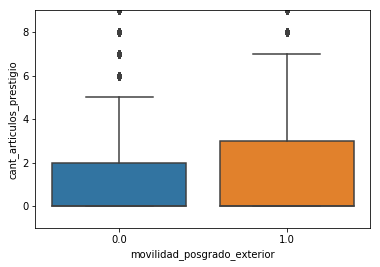

In [290]:
sns.boxplot(data=personas,y='cant_articulos_prestigio',x='movilidad_posgrado_exterior')

plt.ylim(-1,9)

(-1, 20)

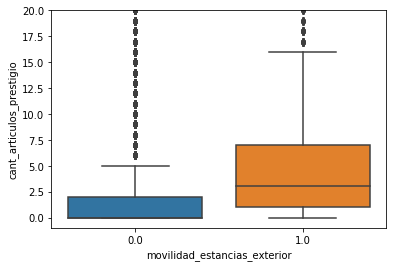

In [291]:

sns.boxplot(data=personas,y='cant_articulos_prestigio',x='movilidad_estancias_exterior')

plt.ylim(-1,20)

(-5, 25)

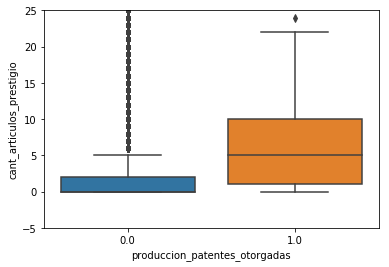

In [292]:


sns.boxplot(data=personas,y='cant_articulos_prestigio',x='produccion_patentes_otorgadas')

plt.ylim(-5,25)

(-2, 50)

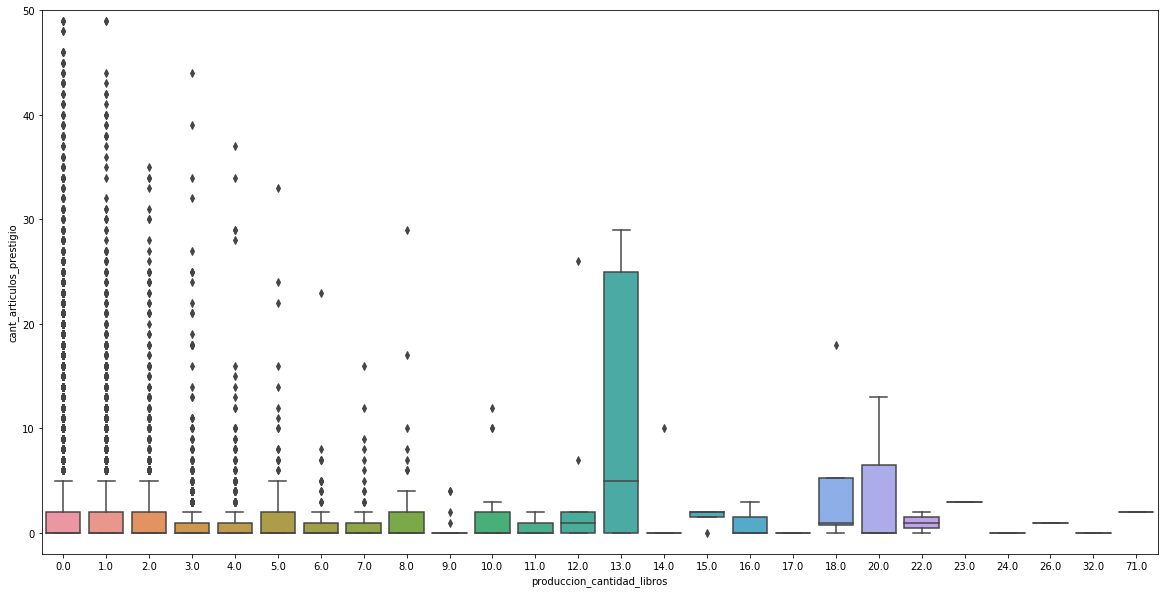

In [293]:
plt.figure(figsize=(20,10))

sns.boxplot(data=personas,y='cant_articulos_prestigio',x='produccion_cantidad_libros')

plt.ylim(-2,50)

(-5, 25)

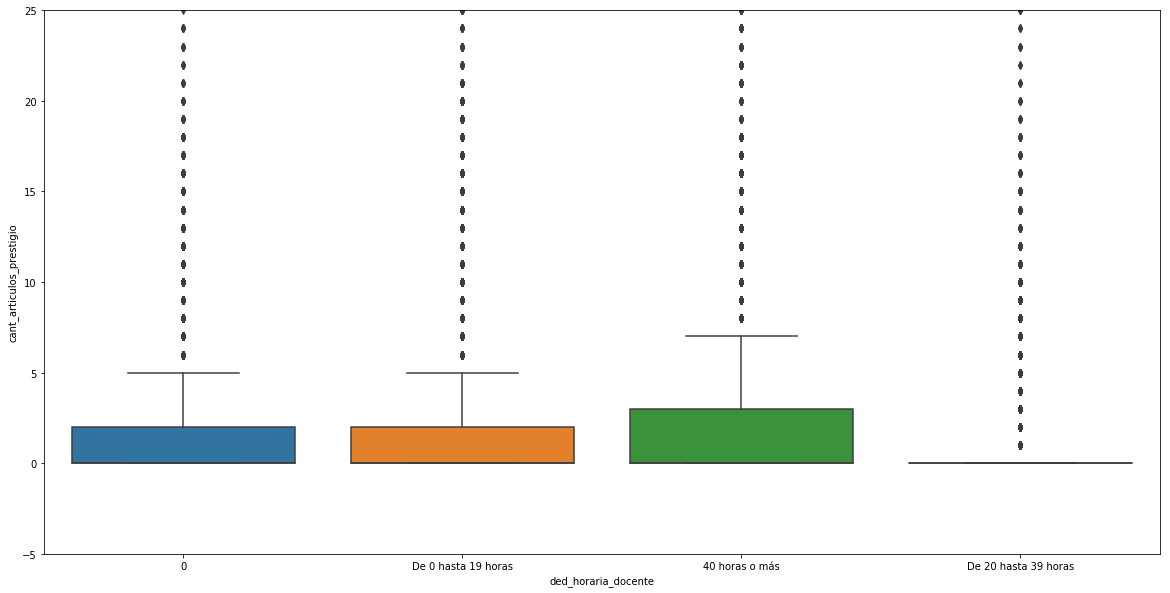

In [294]:
plt.figure(figsize=(20,10))



sns.boxplot(data=personas,y='cant_articulos_prestigio',x='ded_horaria_docente')

plt.ylim(-5,25)

(-2, 25)

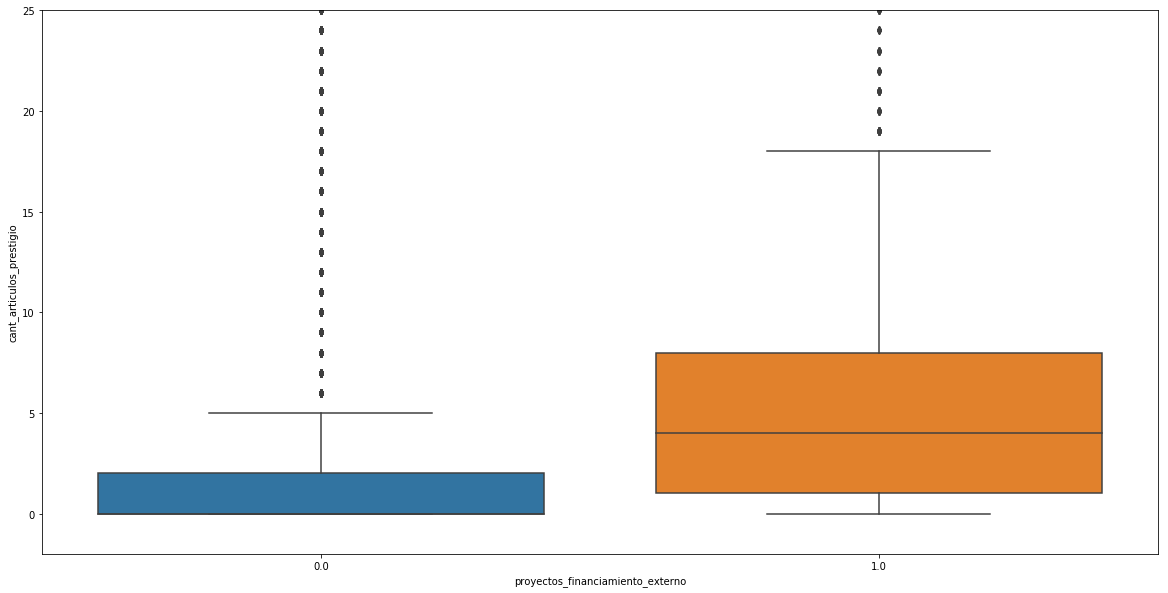

In [295]:


plt.figure(figsize=(20,10))



sns.boxplot(data=personas,y='cant_articulos_prestigio',x='proyectos_financiamiento_externo')

plt.ylim(-2,25)

In [296]:
personas.pivot_table(['cant_articulos_prestigio','produccion_cantidad_articulos_total'],['sexo','proyectos_direccion'],aggfunc={'cant_articulos_prestigio':['count','sum','median','mean'],
                                                                                                                                'produccion_cantidad_articulos_total':['sum','median','mean']})

cant_articulos_prestigio                             \
                                            count       mean median      sum   
sexo proyectos_direccion                                                       
F    0.0                                  32101.0   1.540949    0.0  49466.0   
     1.0                                    535.0   9.188785    7.0   4916.0   
M    0.0                                  22790.0   1.924309    0.0  43855.0   
     1.0                                    626.0  12.054313    9.0   7546.0   

                         produccion_cantidad_articulos_total                  
                                                        mean median      sum  
sexo proyectos_direccion                                                      
F    0.0                                            2.699822    1.0  86667.0  
     1.0                                           11.037383    9.0   5905.0  
M    0.0                                            3.156999    1.0  71948.0  
     1.0                                           14.202875   11.0   8891.0

In [297]:
personas.columns

Index(['persona_id', 'publico_articulos', 'cant_articulos_prestigio',
       'publico_prestigio', 'produccion_cantidad_articulos_total',
       'movilidad_posgrado_exterior', 'movilidad_estancias_exterior',
       'produccion_cantidad_libros', 'produccion_patentes_solicitadas',
       'produccion_patentes_otorgadas', 'actividad_evaluacion_rrhh_becarios',
       'actividad_evaluacion_rrhh_investigadores',
       'actividad_evaluacion_rrhh_premios',
       'actividad_evaluacion_comite_editorial_nacional',
       'actividad_evaluacion_referato_nacional',
       'actividad_evaluacion_comite_editorial_internacional',
       'actividad_evaluacion_referato_internacional',
       'actividad_evaluacion_proyectos', 'proyectos_direccion',
       'formacion_participacion_taller', 'formacion_participacion_conferencia',
       'produccion_publicacion_congreso', 'membresia_asociaciones_cyt',
       'movilidad_posdoctorado_exterior', 'proyectos_financiamiento_externo',
       'sexo', 'prod_ultimo_año'

(-1, 30)

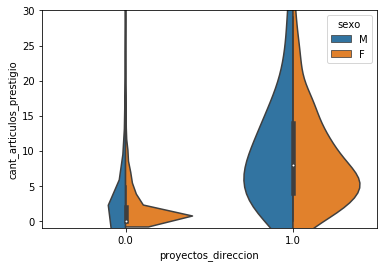

In [298]:
sns.violinplot(data=personas,y='cant_articulos_prestigio',hue='sexo',x='proyectos_direccion',split=True)

plt.ylim(-1,30)

(-2, 40)

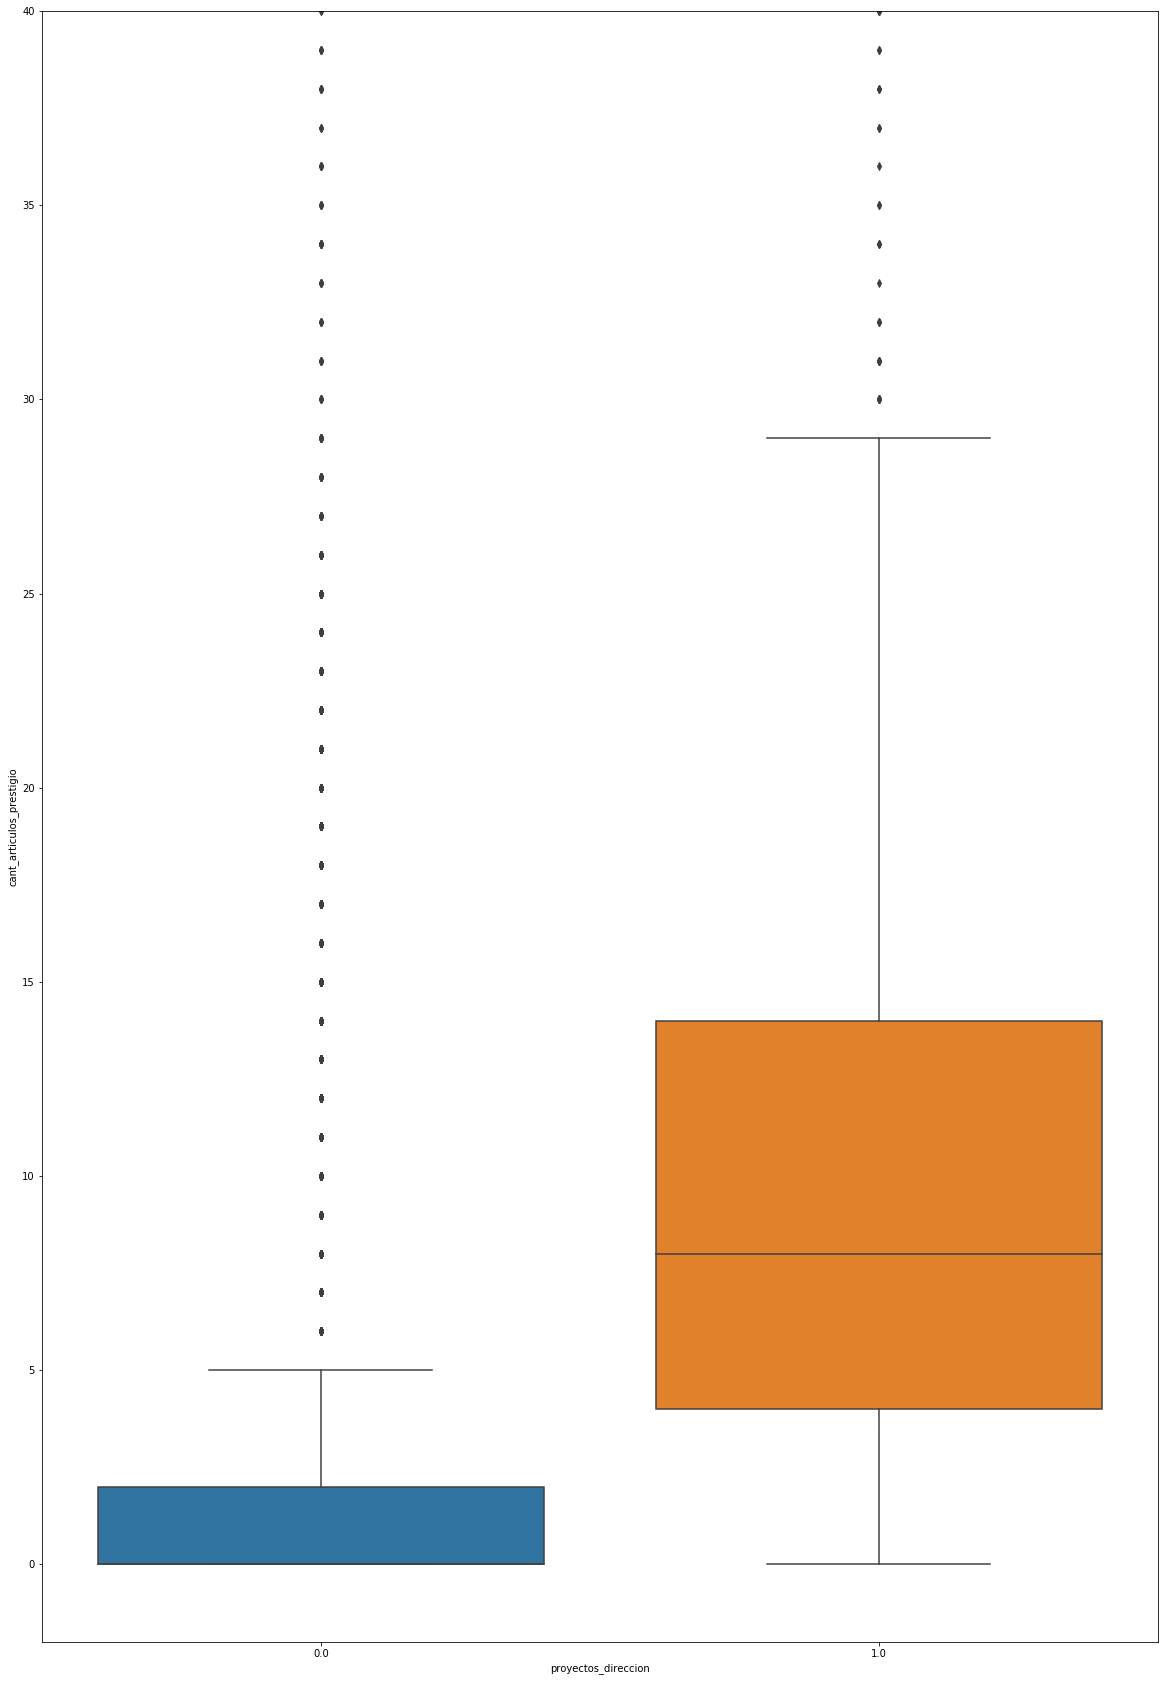

In [299]:
plt.figure(figsize=(20,30))



sns.boxplot(data=personas,y='cant_articulos_prestigio',x='proyectos_direccion')

plt.ylim(-2,40)

(-2, 40)

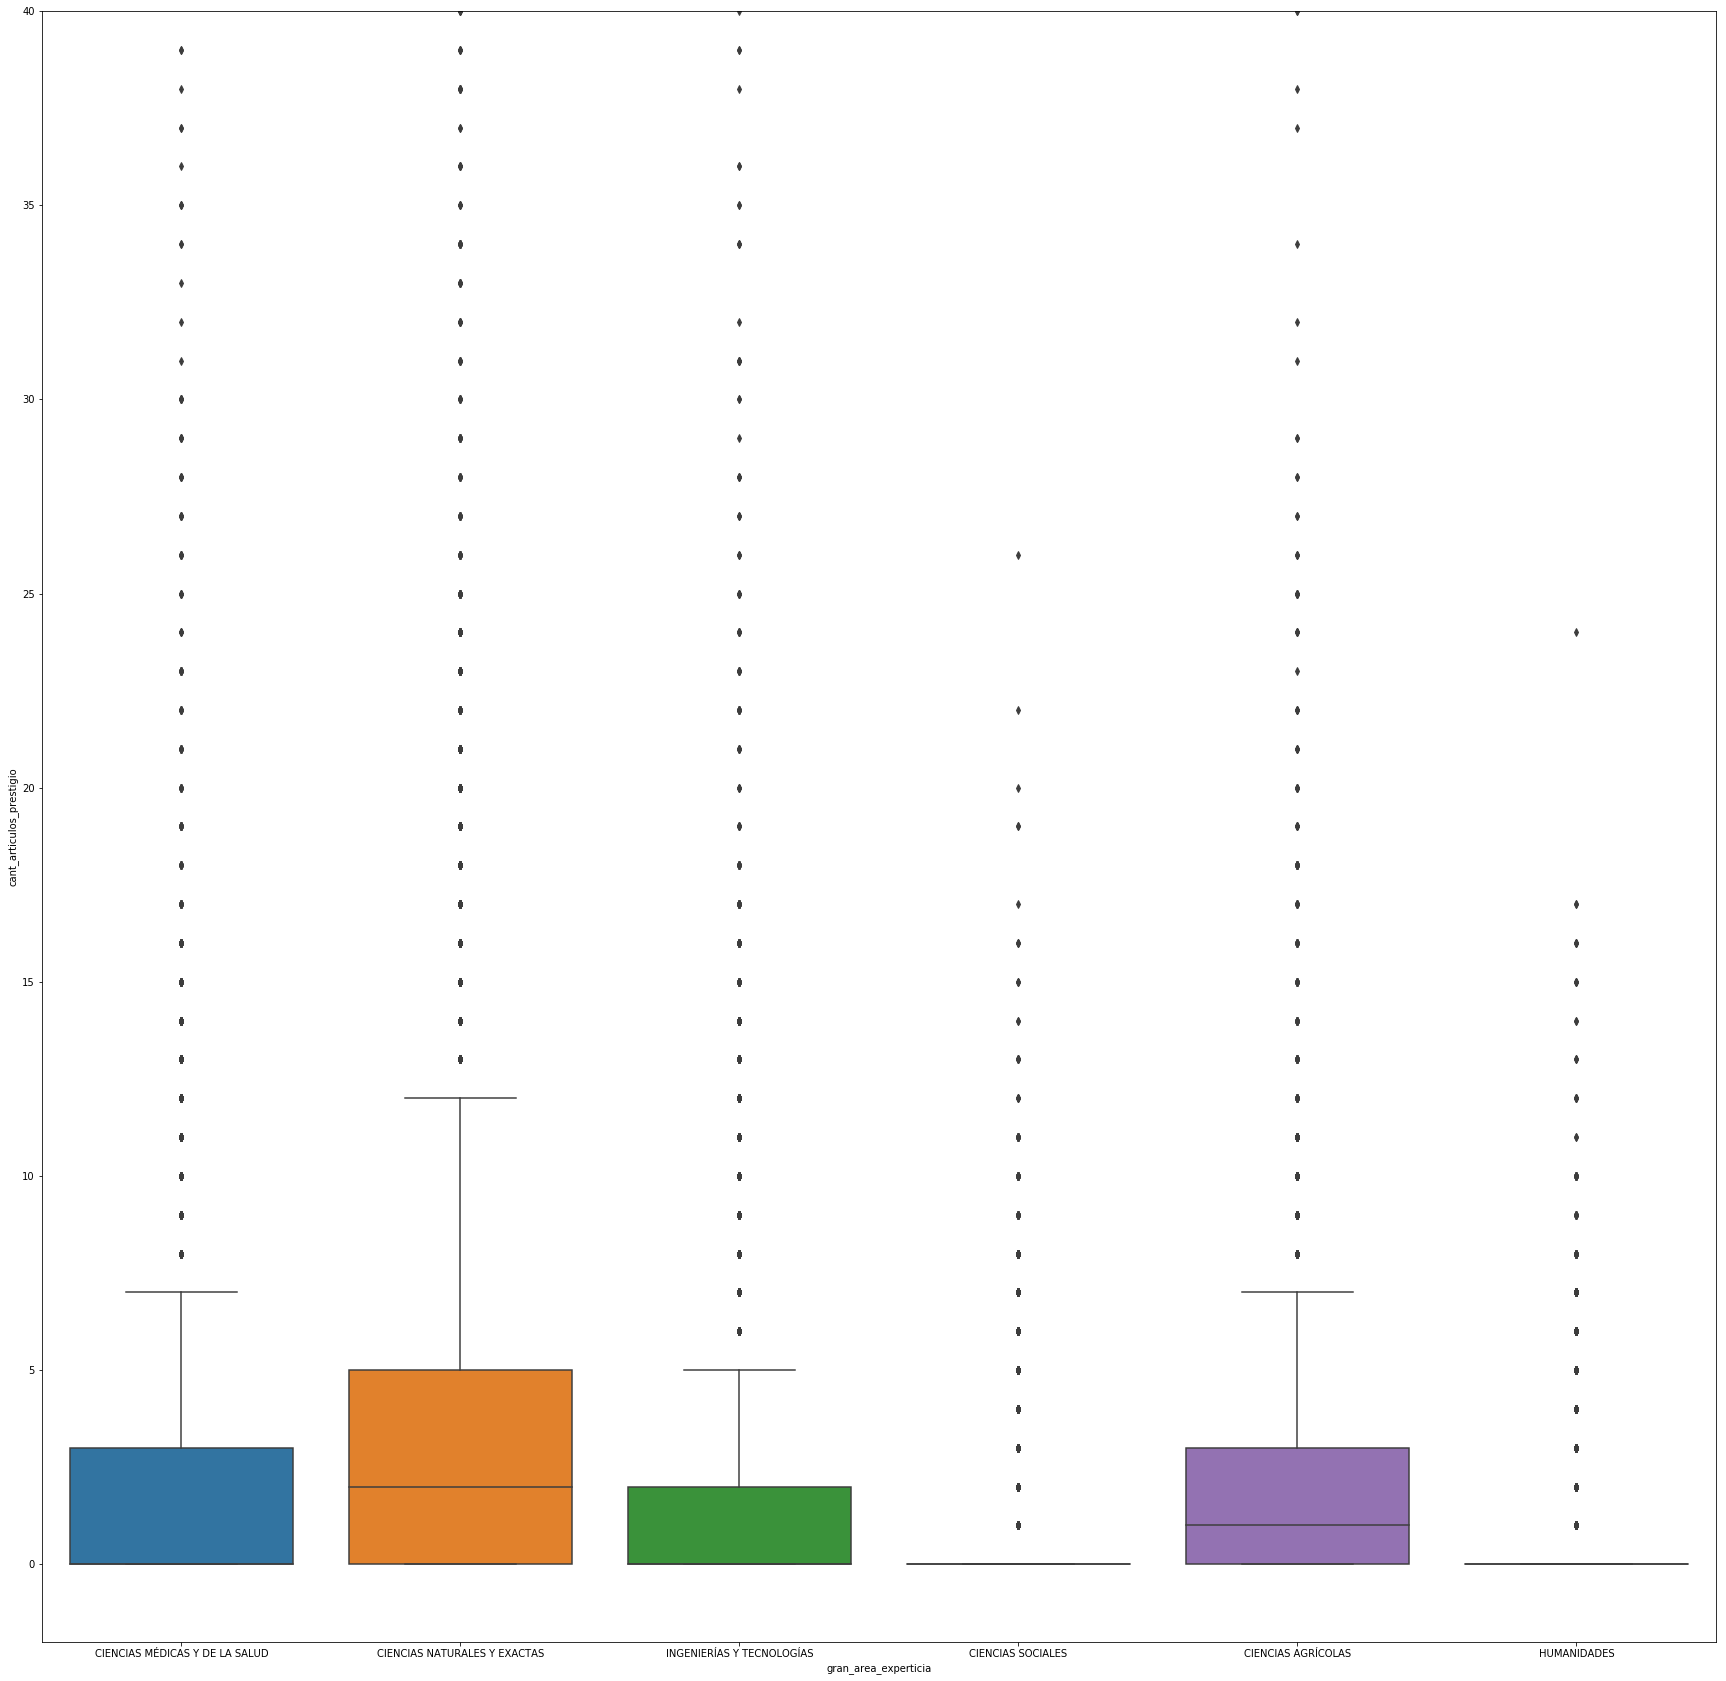

In [300]:
plt.figure(figsize=(30,30))


sns.boxplot(data=personas,y='cant_articulos_prestigio',x='gran_area_experticia')

plt.ylim(-2,40)